In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d


<ipython-input-1-fae25a057114>:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_and_average_scores(sys, num, mtype):
    folder_dir = '/content/drive/MyDrive/FYP_multirobotSLAM/score_csv_new/'
    # init list
    csvnames=list()
    for csv in range(num):
      csvnames.append(folder_dir + "map_scores_" + sys + str(csv+1) + ".csv")
    csvnames.sort()
    dfs = []

    for i in range(num):
        file_path = csvnames[i]
        df = pd.read_csv(file_path)
        if sys=="multi":
          df = df[df["maptype"] == mtype]
        dfs.append(df[['timestep', 'score1', 'score2', 'score3', 'score4']])

    # Concatenate all dataframes and calculate the mean over timestep
    combined_df = pd.concat(dfs).groupby('timestep').mean().reset_index()
    return combined_df

def plot_scores(df):
    #plt.style.use('sns')
    plt.figure(figsize=(10, 6))
    for score in ['score1', 'score2', 'score3', 'score4']:
        plt.plot(df['timestep'], df[score], label=score)

    plt.xlabel('Timestep')
    plt.ylabel('Average Score')
    plt.title('Average Scores Over Time')
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
dfm=load_and_average_scores('multi', 19, '_main')
dfr1=load_and_average_scores('multi', 19, 'tb3_0')
dfr2=load_and_average_scores('multi', 19, 'tb3_1')
dfs=load_and_average_scores('single', 19, '_main')
#plot_scores(dfs)

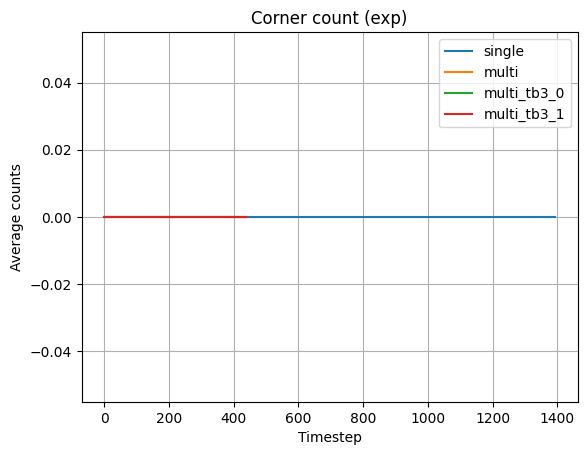

In [5]:
ysmoothed = gaussian_filter1d(dfs['score1'], sigma=10)
plt.plot(dfs['timestep'], ysmoothed, label="single")
ysmoothed = gaussian_filter1d(dfm['score1'], sigma=10)
plt.plot(dfm['timestep'], ysmoothed, label="multi")
ysmoothed = gaussian_filter1d(dfr1['score1'], sigma=10)
plt.plot(dfr1['timestep'], ysmoothed, label="multi_tb3_0")
ysmoothed = gaussian_filter1d(dfr2['score1'], sigma=10)
plt.plot(dfr2['timestep'], ysmoothed, label="multi_tb3_1")

plt.xlabel('Timestep')
plt.ylabel('Average counts')
plt.title('Corner count (exp)')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score1_exp1')
plt.show()


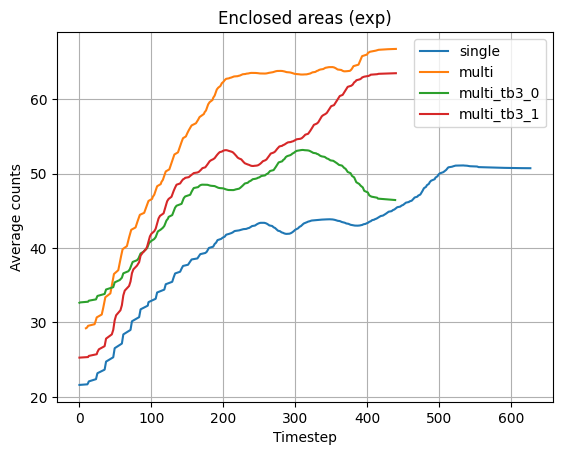

In [ ]:
ysmoothed = gaussian_filter1d(dfs['score2'], sigma=10)
plt.plot(dfs['timestep'], ysmoothed, label="single")
ysmoothed = gaussian_filter1d(dfm['score2'], sigma=10)
plt.plot(dfm['timestep'], ysmoothed, label="multi")
ysmoothed = gaussian_filter1d(dfr1['score2'], sigma=10)
plt.plot(dfr1['timestep'], ysmoothed, label="multi_tb3_0")
ysmoothed = gaussian_filter1d(dfr2['score2'], sigma=10)
plt.plot(dfr2['timestep'], ysmoothed, label="multi_tb3_1")

plt.xlabel('Timestep')
plt.ylabel('Average counts')
plt.title('Enclosed areas (exp)')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score2_exp1')
plt.show()

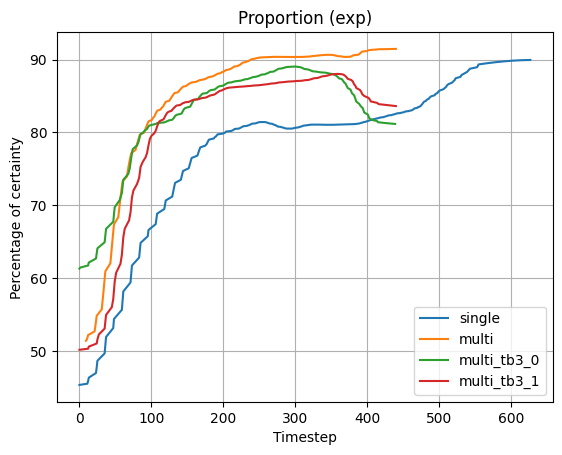

In [10]:
ysmoothed = gaussian_filter1d(dfs['score3'], sigma=10)
plt.plot(dfs['timestep'], ysmoothed, label="single")
ysmoothed = gaussian_filter1d(dfm['score3'], sigma=10)
plt.plot(dfm['timestep'], ysmoothed, label="multi")
ysmoothed = gaussian_filter1d(dfr1['score3'], sigma=10)
plt.plot(dfr1['timestep'], ysmoothed, label="multi_tb3_0")
ysmoothed = gaussian_filter1d(dfr2['score3'], sigma=10)
plt.plot(dfr2['timestep'], ysmoothed, label="multi_tb3_1")

plt.xlabel('Timestep')
plt.ylabel('Percentage of certainty')
plt.title('Proportion (exp)')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score3_exp1')
plt.show()

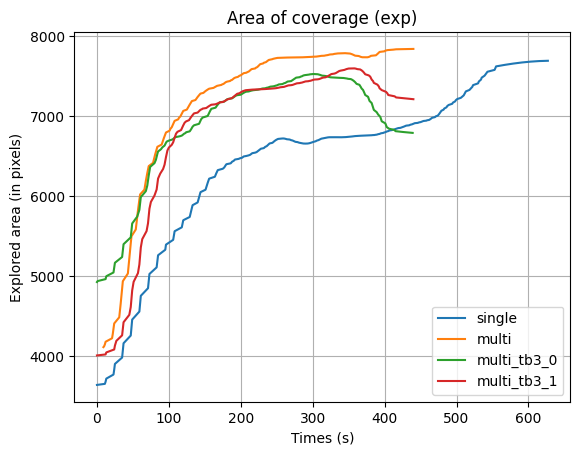

In [ ]:
ysmoothed = gaussian_filter1d(dfs['score4'], sigma=10)
plt.plot(dfs['timestep'], ysmoothed, label="single")
ysmoothed = gaussian_filter1d(dfm['score4'], sigma=10)
plt.plot(dfm['timestep'], ysmoothed, label="multi")
ysmoothed = gaussian_filter1d(dfr1['score4'], sigma=10)
plt.plot(dfr1['timestep'], ysmoothed, label="multi_tb3_0")
ysmoothed = gaussian_filter1d(dfr2['score4'], sigma=10)
plt.plot(dfr2['timestep'], ysmoothed, label="multi_tb3_1")

plt.xlabel('Times (s)')
plt.ylabel('Explored area (in pixels)')
plt.title('Area of coverage (exp)')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/FYP_multirobotSLAM/Plots_fig/score4_exp1')
plt.show()